### A COMPARATIVE ANALYSIS OF LOGISTIC REGRESSION,RANDOM FOREST CLASSIFIER AND SUPPORT VECTOR CLASSIFFIER ON HEART DISEASE DATASET

### Necessary Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
heart_df = pd.read_csv('data/heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
### doing this because i have made adjustments to the original data.
data = heart_df.copy()


## Exploratory Data Analysis

In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [8]:
data.groupby('sex')['age'].mean()## the average age between the male and the female

sex
0    55.849359
1    53.814867
Name: age, dtype: float64

(array([0, 1]), [Text(0, 0, '1'), Text(1, 0, '0')])

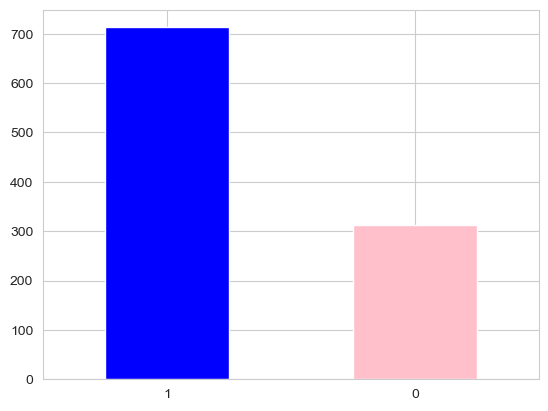

In [9]:
data['sex'].value_counts().plot(kind= 'bar', color= ['blue', 'pink'])
plt.xticks(rotation=0)

In [10]:
data.isna().sum() ### checking for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
data.shape[0] ### checking the amount of rows

1025

In [12]:
data.columns.values ### checking the colunms of the dataframe

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

## Outlier Detection and Removal

In [13]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


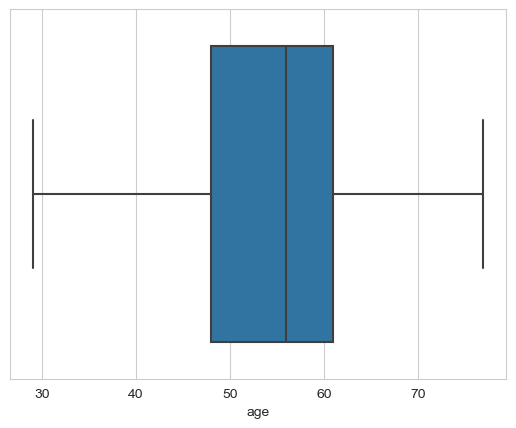

In [14]:
sns.boxplot(data=data,
           x='age')
plt.show()

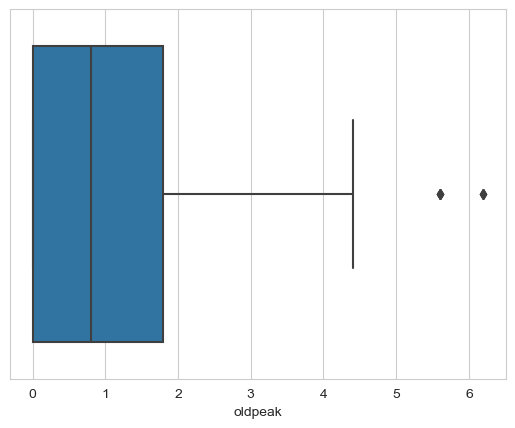

In [15]:
sns.boxplot(data=data,
           x= 'oldpeak')
plt.show()

In [16]:
Q1 = data['oldpeak']. quantile (0.25)
Q3 = data['oldpeak']. quantile (0.75)
Q1,Q3

(0.0, 1.8)

In [17]:
IQR = Q3-Q1
IQR

1.8

In [18]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-2.7, 4.5)

In [19]:
data[(data['oldpeak']> upper_limit)|(data['oldpeak']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
54,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
69,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
393,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
526,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
613,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
833,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


In [20]:
data.shape

(1025, 14)

In [21]:
data_1 =data[(data['oldpeak']<=upper_limit)&(data['oldpeak'] > lower_limit)]
data_1.shape

(1018, 14)

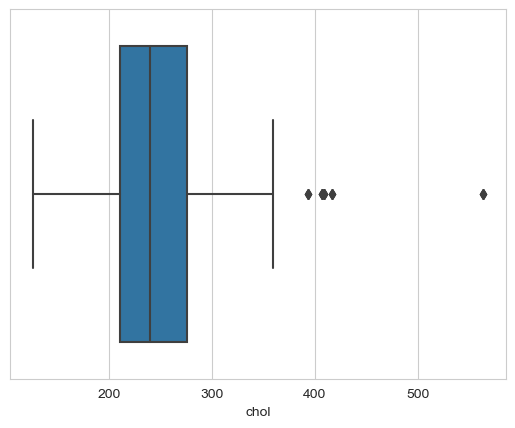

In [22]:
sns.boxplot(data=data_1, x= 'chol')
plt.show()

In [23]:
Q1 = data_1['chol']. quantile (0.25)
Q3 = data_1['chol']. quantile (0.75)
Q1,Q3

(211.0, 275.75)

In [24]:
IQR = Q3 - Q1
IQR

64.75

In [25]:
lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR
lower_limit, upper_limit

(113.875, 372.875)

In [26]:
data_1[(data_1['chol']> upper_limit) | (data_1['chol']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
123,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
158,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
179,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
192,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
255,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
450,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
464,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
481,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
542,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
578,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1


In [27]:
data_2 = data_1[(data_1['chol']<= upper_limit) & (data_1['chol'] >= lower_limit)]
data_2.shape

(1002, 14)

<function matplotlib.pyplot.show(close=None, block=None)>

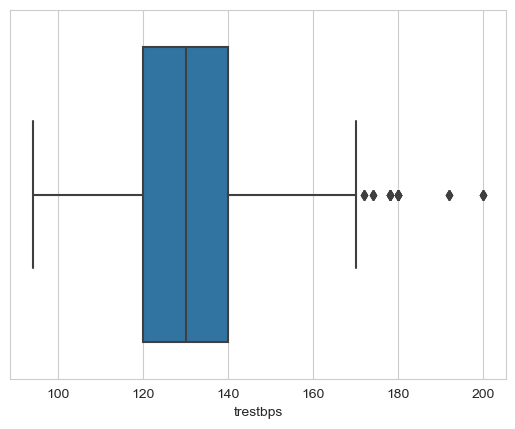

In [28]:
sns.boxplot(data=data_2, x= 'trestbps')
plt.show

In [29]:
Q1 = data_2['trestbps']. quantile (0.25)
Q3 = data_2['trestbps']. quantile (0.75)
Q1,Q3

(120.0, 140.0)

In [30]:
IQR = Q3 - Q1
IQR

20.0

In [31]:
lower_limit = Q1 - 1.5* IQR
upper_limit = Q3 + 1.5* IQR
lower_limit , upper_limit

(90.0, 170.0)

In [32]:
data_2.thal.unique()

array([3, 2, 1, 0], dtype=int64)

In [33]:
data_2[(data_2['trestbps']> upper_limit) | (data_2['trestbps']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
29,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
47,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
87,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
151,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
175,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
229,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
246,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
294,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [34]:
data_3 = data_2[(data_2['trestbps']<= upper_limit) & (data_2['trestbps']> lower_limit)]
data_3.shape

(972, 14)

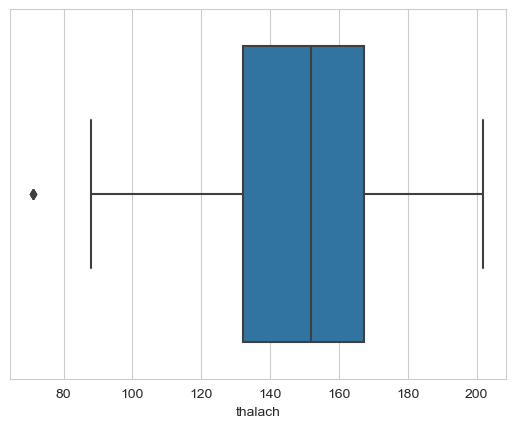

In [35]:
sns.boxplot(data = data_3, x = 'thalach')
plt.show()

In [36]:
Q1 = data_3['thalach']. quantile(0.25)
Q3 = data_3['thalach']. quantile(0.75)
Q1,Q3

(132.0, 167.25)

In [37]:
IQR =Q3 - Q1
IQR

35.25

In [38]:
lower_limit =Q1 - 1.5*IQR
upper_limit =Q3 + 1.5*IQR
lower_limit, upper_limit

(79.125, 220.125)

In [39]:
data_3[(data['thalach']> upper_limit) | (data_3['thalach']< lower_limit)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
267,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
296,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
378,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
559,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [40]:
data_4 = data_3[(data_3['thalach']<= upper_limit) & (data_3['thalach']> lower_limit)]
data_4.shape

(968, 14)

In [41]:
new_data = data_4.copy()

In [42]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [43]:
new_data['age'].unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [44]:
new_data['oldpeak'].unique()

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. , 0.9,
       1.8, 3.4, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3, 3.5])

In [45]:
new_data['sex'].unique()

array([1, 0], dtype=int64)

In [46]:
### Trying to split the data into labels and targets

In [47]:
x = new_data.drop('target', axis = 1)
y = new_data['target']

In [48]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

### Feature Scaling

In [50]:
from sklearn.preprocessing import StandardScaler


In [51]:
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [52]:
new_data['target'].value_counts(normalize = True)

1    0.524793
0    0.475207
Name: target, dtype: float64

In [53]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [54]:
x_scaled = sc.transform(x)
x_scaled

array([[-0.22728287,  0.62994079, -0.93387239, ...,  0.97518257,
         1.22183379,  1.11687593],
       [-0.11766163,  0.62994079, -0.93387239, ..., -2.33121578,
        -0.72987431,  1.11687593],
       [ 1.74589933,  0.62994079, -0.93387239, ..., -2.33121578,
        -0.72987431,  1.11687593],
       ...,
       [-0.77538903,  0.62994079, -0.93387239, ..., -0.6780166 ,
         0.24597974, -0.48956671],
       [-0.44652533, -1.58745079, -0.93387239, ...,  0.97518257,
        -0.72987431, -0.48956671],
       [-0.0080404 ,  0.62994079, -0.93387239, ..., -0.6780166 ,
         0.24597974,  1.11687593]])

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size= 0.2, random_state=42)

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((774, 13), (194, 13), (774,), (194,))

In [58]:
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression()

In [59]:
reg.score(x_test, y_test)

0.8556701030927835

In [60]:
reg.score(x_train, y_train)

0.8540051679586563

In [61]:
reg.coef_

array([[-0.16190957, -0.87384856,  0.79110963, -0.26169295, -0.47529366,
        -0.01845887,  0.20547376,  0.52661799, -0.41612638, -0.8136072 ,
         0.28402606, -0.67536946, -0.54564504]])

In [62]:
reg.intercept_


array([-0.08741913])

In [63]:
model = RandomForestClassifier()

In [64]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [65]:
model.score(x_test, y_test)

1.0

In [66]:
model.score(x_train, y_train)

1.0

In [67]:
## it shows above that the RandomForest is overfitting causing our model to appear too perfect


In [68]:
svm = SVC()

In [69]:
svm.fit(x_train, y_train)

SVC()

In [70]:
svm.score(x_test, y_test)

0.9175257731958762

In [71]:
svm.score(x_train, y_train)

0.9599483204134367

## $y = mx + c$

In [72]:
y_pred = reg.predict(x_test)
y_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [73]:
y_pred_proba = reg.predict_proba(x_test)
y_pred_proba[:10]

array([[0.03292697, 0.96707303],
       [0.06944598, 0.93055402],
       [0.99704156, 0.00295844],
       [0.9326791 , 0.0673209 ],
       [0.11591116, 0.88408884],
       [0.42732061, 0.57267939],
       [0.30935387, 0.69064613],
       [0.85970387, 0.14029613],
       [0.2214232 , 0.7785768 ],
       [0.9152355 , 0.0847645 ]])

In [74]:
y_pred1 = model.predict(x_test)
y_pred1

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [75]:
y_pred1_proba = model.predict_proba(x_test)
y_pred1_proba[:10]

array([[0.01, 0.99],
       [0.  , 1.  ],
       [0.98, 0.02],
       [0.99, 0.01],
       [0.04, 0.96],
       [0.94, 0.06],
       [0.01, 0.99],
       [0.95, 0.05],
       [0.04, 0.96],
       [0.96, 0.04]])

In [76]:
y_pred2 = svm.predict(x_test)
y_pred2

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int64)

In [77]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[69 17]
 [11 97]]


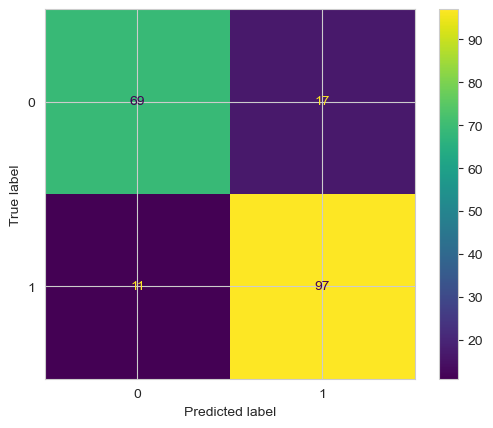

In [78]:
display = ConfusionMatrixDisplay(cm, display_labels=reg.classes_)
display.plot();

In [79]:
accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score

0.8556701030927835

In [80]:
print("The accuracy score of the SVC model is:{0:.2f}%". format (accuracy_score*100))

The accuracy score of the SVC model is:85.57%


In [81]:
print("The accuracy score of the Logistic Regression model is:{0:.2f}%". format (accuracy_score*100))

The accuracy score of the Logistic Regression model is:85.57%


In [82]:
print("the accuracy score of the Random Forest model is:{0:.2f}%". format (accuracy_score*100))

the accuracy score of the Random Forest model is:85.57%


### Classification Report

In [83]:
corr = data.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


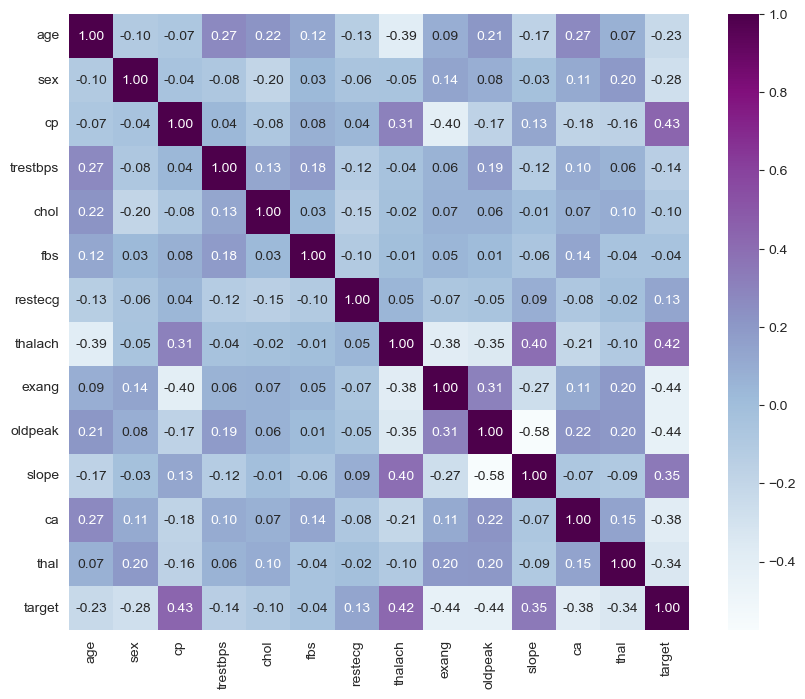

In [84]:
plt.figure(figsize = (10,8))
sns.heatmap(corr,
           fmt = '.2f',
           annot = True,
           cmap='BuPu')
plt.show()

## In conclusion,all models used performed very well, but the Support Vector Machine(SVM) performer better for this binary classification due to how it performed on both the test and train dataset.